In [1]:
from prevo.misc import DummyCirculatedBath
from prevo.control import PeriodicControl, Program, Stairs, Teeth
%matplotlib inline

# Define Control Object

In [ ]:
class BathControl(PeriodicControl):
    """Dummy control object"""

    # Allowed inputs as parameters for control (e.g., vapor pressure, %RH etc)
    # (optional, only for checking entries)
    possible_inputs = 'T', 'K'

    def __init__(self, bath, dt=1):
        super().__init__(dt=dt, print_log=True, save_log=False)
        self.bath = bath

    def _convert_input(self, **values):
        """Convert input from kwargs given to ramp().

        Normally, the kwargs key is in possible_inputs
        and at this stage the input has already been
        checked that it is indeed in possible_inputs
        """
        (temp_unit, temp_value), = values.items()
        if temp_unit == 'T':
            return temp_value
        else:
            return temp_value - 273.15

    def _apply_setting(self, value):
        self.bath.setpt = value

    def _read_setting(self):
        return self.bath.setpt

    def _print_setting(self, value):
        """Optional, but can be subclassed for better readability of setting info"""
        return f'Bath setting: T={value}°C'

# Simple operation of control object

In [3]:
bath = DummyCirculatedBath()
ctrl = BathControl(bath=bath)

In [4]:
ctrl.ramp('::5', T=(20, 25))

[2023-08-11 16:33:24] ==> NEW STEP from T=20 to T=25 in ::5

[2023-08-11 16:33:24] Bath setting: T=20.0°C

[2023-08-11 16:33:25] Bath setting: T=21.003°C

[2023-08-11 16:33:26] Bath setting: T=22.005°C

[2023-08-11 16:33:27] Bath setting: T=23.003°C

[2023-08-11 16:33:28] Bath setting: T=24.0°C

[2023-08-11 16:33:29] Bath setting: T=25°C



In [5]:
ctrl.ramp('::10', K=(283.15, 298.15))

[2023-08-11 16:33:37] ==> NEW STEP from K=283.15 to K=298.15 in ::10

[2023-08-11 16:33:37] Bath setting: T=10.0°C

[2023-08-11 16:33:38] Bath setting: T=11.503°C

[2023-08-11 16:33:39] Bath setting: T=13.008°C

[2023-08-11 16:33:40] Bath setting: T=14.505°C



In [6]:
ctrl.stop()

[2023-08-11 16:33:41] ==X Manual STOP



# Run Programs on Control object

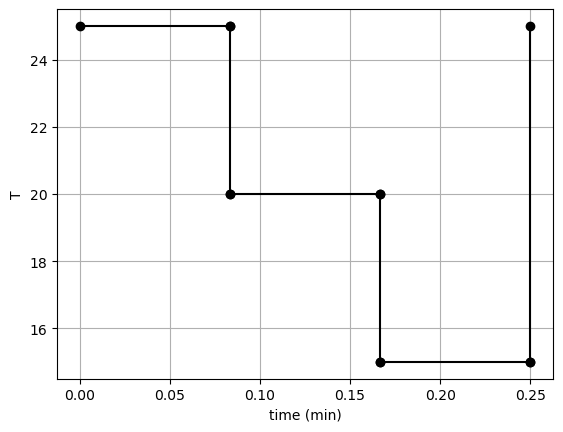

In [8]:
prog = Stairs(control=ctrl, duration='::5', T=[25, 20, 15])
prog.plot()

In [9]:
prog.run()

[2023-08-11 16:33:47] ------ PROGRAM (T)--- NEW CYCLE 1 / 1

[2023-08-11 16:33:47] ==> NEW STEP from T=25 to T=25 in ::5

[2023-08-11 16:33:47] Bath setting: T=25°C

[2023-08-11 16:33:47] Dwelling started (T=25)



In [10]:
prog.stop()

[2023-08-11 16:33:52] ==X Manual STOP

[2023-08-11 16:33:52] ------ PROGRAM (T)--- STOPPED



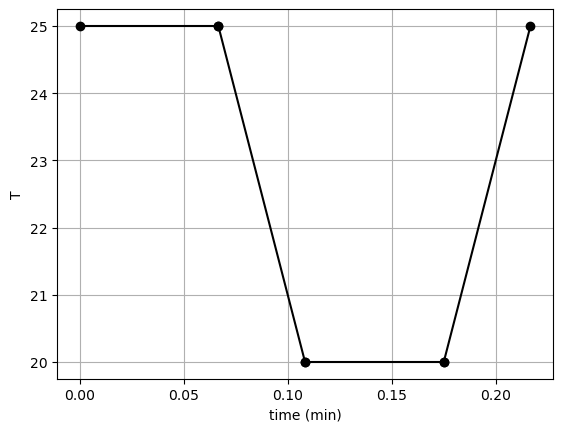

In [11]:
prog = Teeth(control=ctrl, slope=2, slope_unit='/s', plateau_duration="::4", T=[25, 20], repeat=2)
prog.plot()

In [12]:
prog.run()

[2023-08-11 16:33:55] ------ PROGRAM (T)--- NEW CYCLE 1 / 3

[2023-08-11 16:33:55] ==> NEW STEP from T=25 to T=25 in ::4

[2023-08-11 16:33:55] Bath setting: T=25°C

[2023-08-11 16:33:55] Dwelling started (T=25)



In [13]:
prog.stop()

[2023-08-11 16:33:58] ==X Manual STOP

[2023-08-11 16:33:58] ------ PROGRAM (T)--- STOPPED

